In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string

In [2]:
df = pd.read_csv('data/ADR_paper_supplement_4_rankings.csv')
df

,Name,Rank score,Rank Stdev (% out 2929),Z score
0,CARDIAC ARREST,1.00,0.90,1.114782
1,BONE CANCER METASTATIC,0.98,0.20,4.798294
2,LEFT VENTRICULAR FAILURE,0.97,0.84,1.160131
3,HIV INFECTION,0.97,0.81,1.200011
4,ANAL CANCER,0.96,0.16,6.113647
...,...,...,...,...
2924,DECREASED APPETITE,0.04,9.47,0.004445
2925,DRY MOUTH,0.04,4.04,0.010134
2926,EARLY MORNING AWAKENING,0.03,0.22,0.130733
2927,EUPHORIC MOOD,0.03,1.44,0.018796


In [3]:
print(df.isnull().sum())

Name                       0
Rank score                 0
Rank Stdev (% out 2929)    0
Z score                    0
dtype: int64


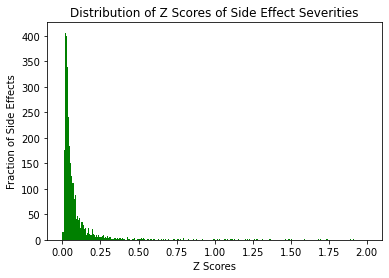

In [4]:
_ = plt.hist(df['Z score'], bins='auto', range=(0,2),  color ='green')
plt.title('Distribution of Z Scores of Side Effect Severities')
plt.xlabel('Z Scores')
plt.ylabel('Fraction of Side Effects')
plt.show()

In [5]:
df

,Name,Rank score,Rank Stdev (% out 2929),Z score
0,CARDIAC ARREST,1.00,0.90,1.114782
1,BONE CANCER METASTATIC,0.98,0.20,4.798294
2,LEFT VENTRICULAR FAILURE,0.97,0.84,1.160131
3,HIV INFECTION,0.97,0.81,1.200011
4,ANAL CANCER,0.96,0.16,6.113647
...,...,...,...,...
2924,DECREASED APPETITE,0.04,9.47,0.004445
2925,DRY MOUTH,0.04,4.04,0.010134
2926,EARLY MORNING AWAKENING,0.03,0.22,0.130733
2927,EUPHORIC MOOD,0.03,1.44,0.018796


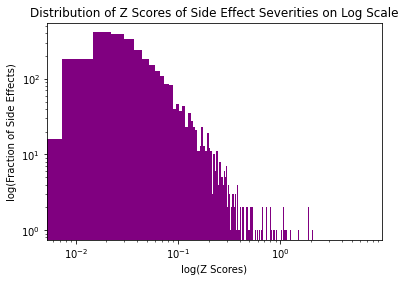

In [177]:
_ = plt.hist(df['Z score'], bins='auto', range=(0,7),  color ='purple')
plt.title('Distribution of Z Scores of Side Effect Severities on Log Scale')
plt.xlabel('log(Z Scores)')
plt.ylabel('log(Fraction of Side Effects)')
plt.xscale('log')
plt.yscale('log')
plt.show()

-0.2899533864497945


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


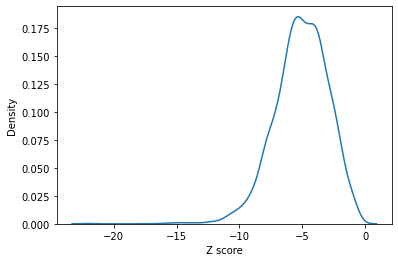

In [178]:
import numpy as np 
from scipy.stats import boxcox 
import seaborn as sns 

sns.distplot(-1/np.sqrt(df['Z score']), hist=False, kde=True) 

#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(df['Z score']) 

#plot the distribution of the transformed data values
#sns.distplot(transformed_data, hist=False, kde=True) 

print(best_lambda)

In [179]:
print(np.quantile(transformed_data, 0.2))
print(np.quantile(transformed_data, 0.4))
print(np.quantile(transformed_data, 0.6))
print(np.quantile(transformed_data, 0.8))

-7.001616556919803
-5.821857545833203
-4.710281205814413
-3.453477057093062


In [180]:
df['Trans_Z_Score'] = transformed_data

In [181]:
print(df.isnull().sum())

Name                       0
Rank score                 0
Rank Stdev (% out 2929)    0
Z score                    0
Trans_Z_Score              0
dtype: int64


In [182]:
severity_cat = []
for i in transformed_data:
    if i <= np.quantile(transformed_data, 0.2):
        severity_cat.append(-2)
    elif i <= np.quantile(transformed_data, 0.4):
        severity_cat.append(-1)
    elif i <= np.quantile(transformed_data, 0.6):
        severity_cat.append(0)
    elif i <= np.quantile(transformed_data, 0.8):
        severity_cat.append(1)
    elif i <= np.quantile(transformed_data, 1):
        severity_cat.append(2)

df['severity_cat'] = severity_cat
df['Name'] = [i.lower() for i in df['Name']]

In [183]:
d = {'side_effect' : df['Name'], 'severity' : df['Z score']}
df_scat = pd.DataFrame(data=d)


Averaging the Side Effect Frequencies

In [184]:
df_se = pd.read_csv('data/SIDER_drug_to_sideff_weighted_nothres.tsv',sep='\t',header=None)
df_se.columns = ['drug','side_effect','freq']
df_se['side_effect'] = [i.lower() for i in df_se['side_effect']]
df_se

,drug,side_effect,freq
0,carnitine,abdominal pain,0.21
1,carnitine,gastrointestinal pain,0.21
2,carnitine,abdominal pain,0.05
3,carnitine,gastrointestinal pain,0.05
4,carnitine,abdominal pain,0.06
...,...,...,...
101205,K779,somnolence,0.02
101206,K779,somnolence,0.03
101207,K779,somnolence,0.33
101208,K779,somnolence,0.05


In [185]:
df_cd = pd.merge(df_se, df_scat, how='left', on = 'side_effect')
df_cd_cols = df_cd.columns
df_cd

,drug,side_effect,freq,severity
0,carnitine,abdominal pain,0.21,0.006558
1,carnitine,gastrointestinal pain,0.21,0.033606
2,carnitine,abdominal pain,0.05,0.006558
3,carnitine,gastrointestinal pain,0.05,0.033606
4,carnitine,abdominal pain,0.06,0.006558
...,...,...,...,...
101205,K779,somnolence,0.02,0.020942
101206,K779,somnolence,0.03,0.020942
101207,K779,somnolence,0.33,0.020942
101208,K779,somnolence,0.05,0.020942


In [186]:
result = pd.concat([df_cd[['drug','side_effect']], df_cd], axis=1)
result['fts'] = result['freq'] * result['severity']
result

,drug,side_effect,drug,side_effect,freq,severity,fts
0,carnitine,abdominal pain,carnitine,abdominal pain,0.21,0.006558,0.001377
1,carnitine,gastrointestinal pain,carnitine,gastrointestinal pain,0.21,0.033606,0.007057
2,carnitine,abdominal pain,carnitine,abdominal pain,0.05,0.006558,0.000328
3,carnitine,gastrointestinal pain,carnitine,gastrointestinal pain,0.05,0.033606,0.001680
4,carnitine,abdominal pain,carnitine,abdominal pain,0.06,0.006558,0.000394
...,...,...,...,...,...,...,...
101205,K779,somnolence,K779,somnolence,0.02,0.020942,0.000419
101206,K779,somnolence,K779,somnolence,0.03,0.020942,0.000628
101207,K779,somnolence,K779,somnolence,0.33,0.020942,0.006911
101208,K779,somnolence,K779,somnolence,0.05,0.020942,0.001047


Calculating the Risk Score for each Drug

In [187]:
g = df_cd.groupby(['drug'])

risk_scores = []
drugs = []
for key, item in g:
    
    if np.sum(item['severity']) == 0:
        rs = np.sum(item['freq']*item['severity']) / 0.000001
    else:
        rs = np.sum(item['freq']*item['severity']) / np.sum(item['severity'])
        
    risk_scores.append(rs)
    drugs.append(key)
#risk_scores

In [188]:
d = {'drug' : drugs, 'risk_score' : risk_scores}
drug_riskscores = pd.DataFrame(data=d)
drug_riskscores

,drug,risk_score
0,"1,25(OH)2D3",0.025554
1,17-hydroxyprogesterone,0.087007
2,18F-flutemetamol,0.016564
3,2-hydroxysuccinaldehyde,0.083577
4,4-AP,0.044413
...,...,...
804,zoledronic,0.050822
805,zolmitriptan,0.021104
806,zolpidem,0.018378
807,zonisamide,0.039542


In [1]:
drug_riskscores.to_csv('drug_riskscores.csv')

NameError: name 'drug_riskscores' is not defined